<AxesSubplot:xlabel='I-131', ylabel='I-132'>

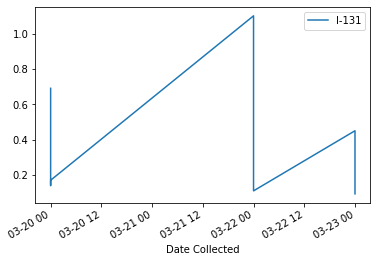

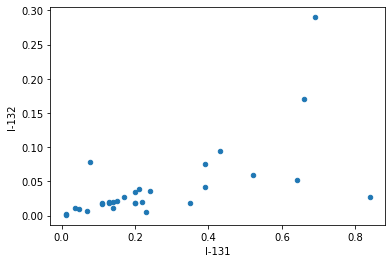

In [169]:
import pandas as pd
import  numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../RadNet_Laboratory_Analysis.csv',
                 header= 0,
)
df.head()
col = df.iloc[:,0:6]
col_numeric = list(set(df.columns)-set(col))
col = list(col)
df.loc[:,col_numeric]=df.loc[:,col_numeric].applymap(lambda x: np.nan
    if ((x=='Non-detect')|(x=="ND")) else x)
col.remove('Date Posted')
col.remove('Date Collected')

for c in col:
    df[c] = df[c].astype('category')
df.dtypes

for c in col_numeric:
    df[c] = pd.to_numeric(df[c])

temp = df.loc[:,df.dtypes == 'object']
for t in temp:
    df[t] = pd.to_datetime(df[t])



<h4>#3 Create a plot with a filter per Location, selecting the city of San Bernardino, and one radionuclide, with the
x-axes set to the date and the y-axes with radionuclide I-131.


<AxesSubplot:xlabel='Date Collected'>

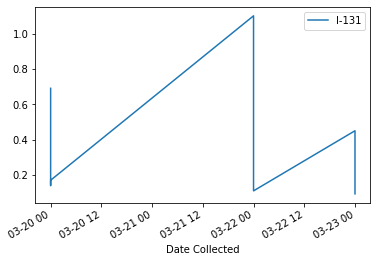

In [170]:
df[df.Location=='San Bernardino'].plot(x='Date Collected',y='I-131')

<h4> #4. Create a plot using matplotlib.plt - matalb style - with the concreation of two related radionuclides
I-131 and I-132

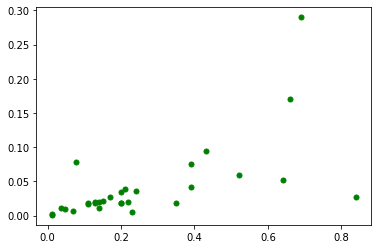

In [191]:
plt.plot(
    df['I-131'],
    df['I-132'],
    marker = 'o',
    linewidth =0,
    markersize = 5,
    color='green'
)

<h4>#5. Create a scatter plot with the concentration of two realted radionycides, I-131 and I-132:

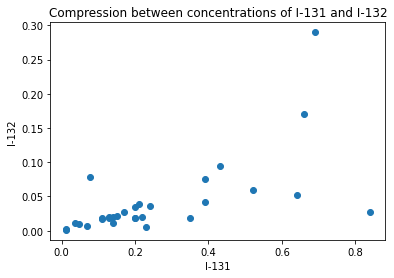

In [193]:
ig, ax = plt.subplots()

ax.scatter(
    x=df['I-131'],
    y = df['I-132']
)
_ = ax.set(
    xlabel = 'I-131',
    ylabel = 'I-132',
    title = 'Compression between concentrations of I-131 and I-132'
)